## Graficador do POCO C2:

In [1]:
####################PACOTES###########################
%matplotlib inline
import numpy as np
import pylab as py
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas.plotting import scatter_matrix
import sys
from string import ascii_uppercase # pacote que plota letras no gráfico
from sklearn.metrics import confusion_matrix

#---------------------
sys.path.insert(0,'../modules')
from appynho import plotagem as plm
from appynho_2 import plotagem as plm2

#######################################################

### Dispersao poco C2:

In [2]:
c2 = pd.read_csv("../inputs/Sintetico/C2_convolvido.txt", sep='\s+' , 
                 skiprows=1, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))

### Visualizando o dado

In [3]:
df2=pd.DataFrame(c2)
df2=df2.drop('Code',axis=1) #retira a coluna codigo
df2=df2.drop('Depth',axis=1) #retira a coluna prof
#df2

## Definindo o codigo das rochas para paleta de cor:
codigo_C2={'#00d34e' :'Shale 2',
           '#82a7dd' :'Dolomite',
           '#ff0004' :'Diabase',
           '#ff6004' :'Conglomerate',
           '#7b7b01' :'Shale 1',
           '#173c72' :'Halite',
           '#000000' : 'Basalt'}


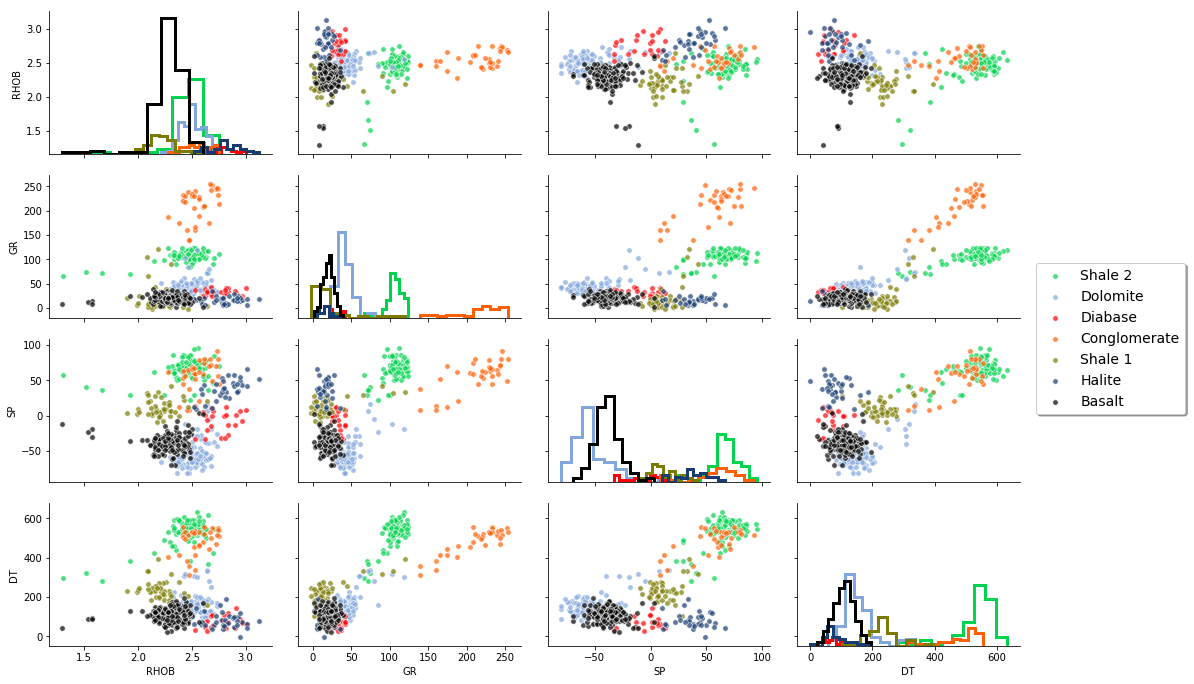

In [4]:
g = sns.PairGrid(df2,hue='Rock',hue_order=None, palette=codigo_C2.keys(), height=2.4, aspect=1.5 )

g.map_diag(plt.hist, histtype="step", linewidth=3) #ERROR
g.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
g.fig.legend(labels=codigo_C2.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.15, 0.5),
             fancybox=True, shadow=True, ncol=(1))

g = g.savefig('../images/C2dispersion_convolvido.pdf', dpi=100,  bbox_inches = 'tight', transparent = True)
#g = g.savefig('../../Latex/imagens/C2dispersion.pdf', dpi=300,  bbox_inches = 'tight', transparent = True)

# Plot dos resultados para o poco C2:

In [5]:
# lê os dados de perfiliagem e rochas originais
poco = pd.read_csv("../inputs/Sintetico/C2_convolvido.txt", sep='\s+' , skiprows=1,
                   names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))

cod = np.array(poco.Code)
prof = np.array(poco.Depth)#*10.0 # unidade em metros
RHOB = np.array(poco.RHOB)
GR = np.array(poco.GR)
SP = np.array(poco.SP)
DT = np.array(poco.DT)

In [6]:
## codigos de rochas encontradas em todas classificacoes e no poco real:
# dicionario com as rochas totais de cada poco:
codigo1={1:['#00d34e','Shale 2'],
        2:['#82a7dd','Dolomite'],
        3:['#ff0004','Diabase'],
        4:['#ff6004','Conglomerate'],
        451:['#f4a15a','Fault Zone (Co-Cr 20%)'], 
        452:['#ffddaa','Fault Zone (Co-Cr 40%)'],
        453:['#ffd9b7','Fault Zone (Co-Cr 40%)'],
        454:['#faead6','Fault Zone (Co-Cr 80%)'],
        5:['#ffbca4','Crystalline'],      
        6:['#7b7b01' ,'Shale 1'],
        7:['#173c72' ,'Halite'],
        8:['#a70001','Granite'],
        9:['#ffe57b', 'Sandstone'],
        10:['black', 'Basalt']}

In [7]:
# Leituras dos dados classificados:

# Le os dados da classificacao Euclideana:
euclides = pd.read_csv('../outputs/Sintetico/Result_eucli_C2_normalizado_convolvido.txt', 
                       sep='\s+' , names=('Depth' ,'Character', 'ClassEucli'))

ClassEuclides = np.array(euclides.ClassEucli)

#Lê os dados da classificação Mahalanobeana
maha = pd.read_csv('../outputs/Sintetico/Result_maha_C2_normalizado_convolvido.txt', 
                   sep='\s+' , names=('Depth' ,'Character', 'ClassMaha'))

ClassMahalanobis = np.array(maha.ClassMaha)

#Lê os dados da classificação Kohoneana
koho = pd.read_csv('../outputs/Sintetico/well_C2_SOM_convolvido.txt', 
                   sep='\s+', names=('Depth' ,'Character1', 'ClassKoho', 'Character2','Real','Character3'))

ClassKohonen = np.array(koho.ClassKoho)




In [8]:
print(len(ClassEuclides),len(ClassKohonen), len(ClassMahalanobis))

502 502 502


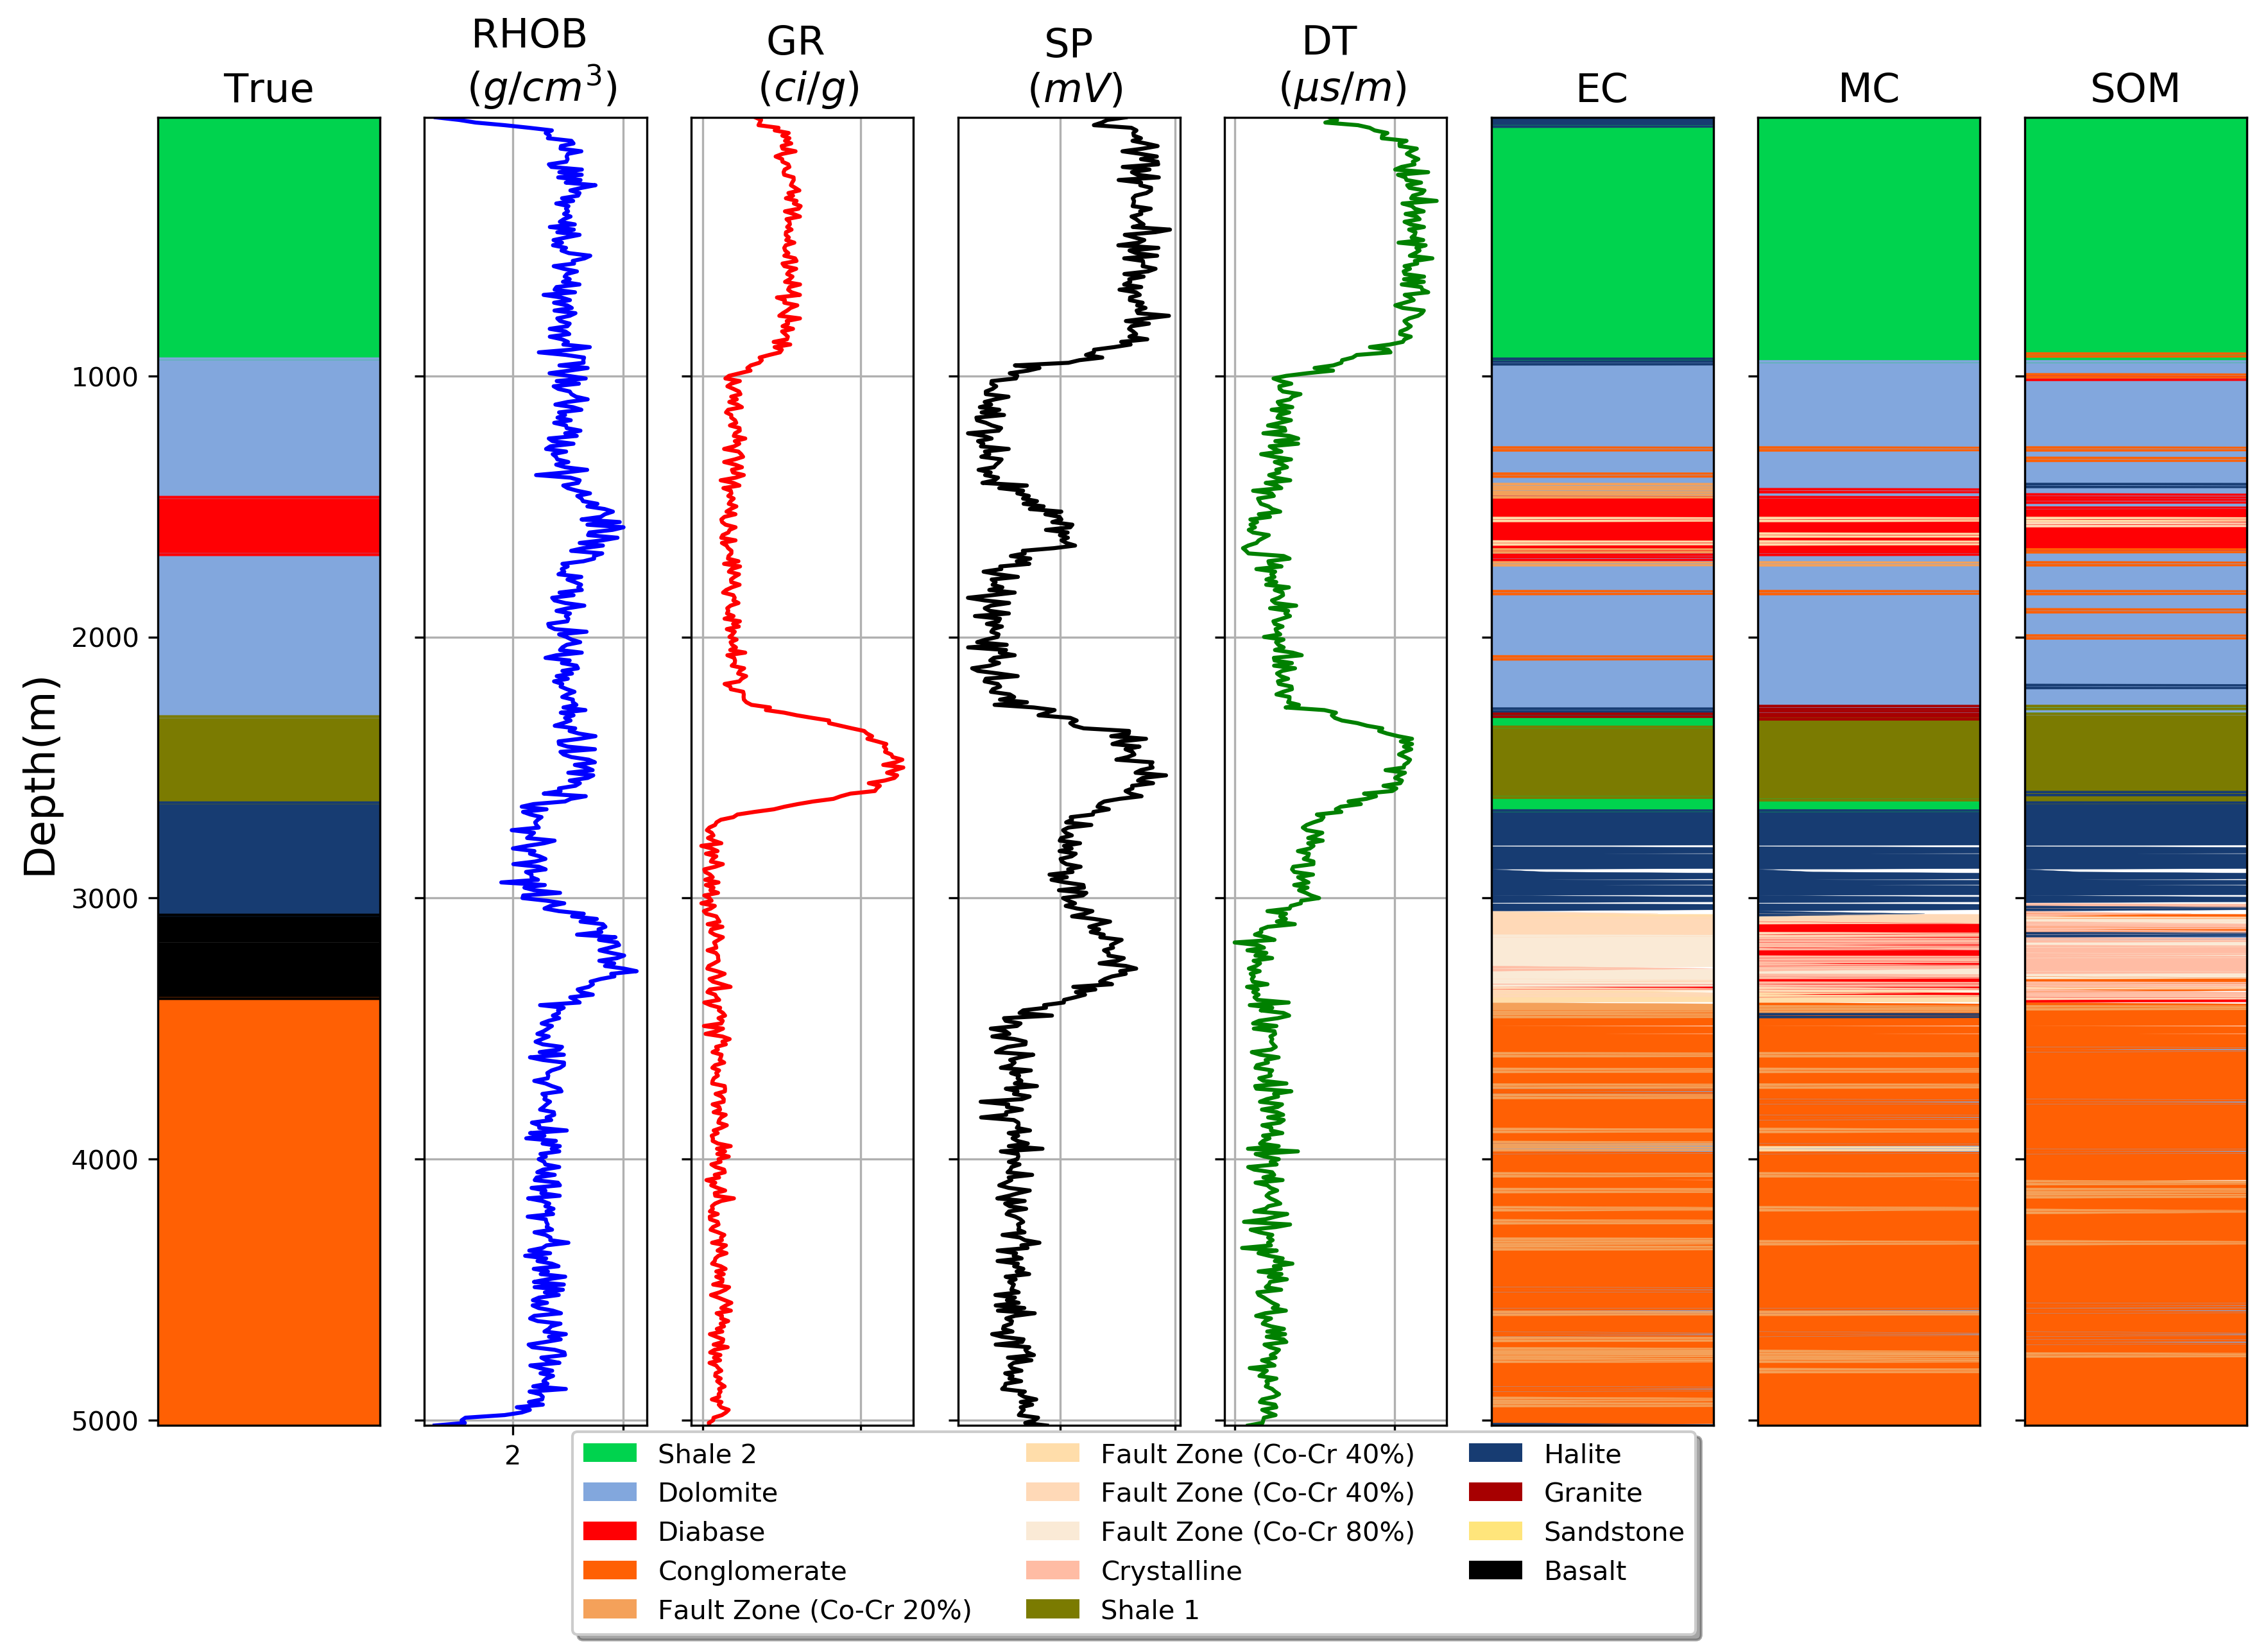

In [9]:
figure = plm(8,altura=9,comprimento=14,dpi=300)
figure.plot_l(0,cod,prof, codigo1, DT,minimo=1,maximo=1.0001,titulo='True', descricao_y='Depth(m)', legend=True)#0 é aprosição do track
figure.plot_s(1,RHOB,prof,cor='b',titulo='RHOB \n $(g/cm^{3})$',descricao_x='')
figure.plot_s(2,GR,prof,cor='r',titulo='GR \n $(ci/g$)',descricao_x='')
figure.plot_s(3,SP,prof,cor='k',titulo='SP\n $(mV)$',descricao_x='')
figure.plot_s(4,DT,prof,cor='g',titulo='DT \n $(\mu s/m)$',descricao_x='')
figure.plot_l(5,ClassEuclides,prof, codigo1, GR,minimo=1,maximo=5,titulo='EC')#0 é aprosição do track
figure.plot_l(6,ClassMahalanobis,prof, codigo1, GR,minimo=1,maximo=5,titulo='MC')
figure.plot_l(7,ClassKohonen,prof, codigo1, GR,minimo=1,maximo=5,titulo='SOM')

plt.savefig('../images/wellC2_convolvido_nx80.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
#plt.savefig('../../Latex/imagens/wellC2.pdf', dpi=300, bbox_inches = 'tight', transparent = True)

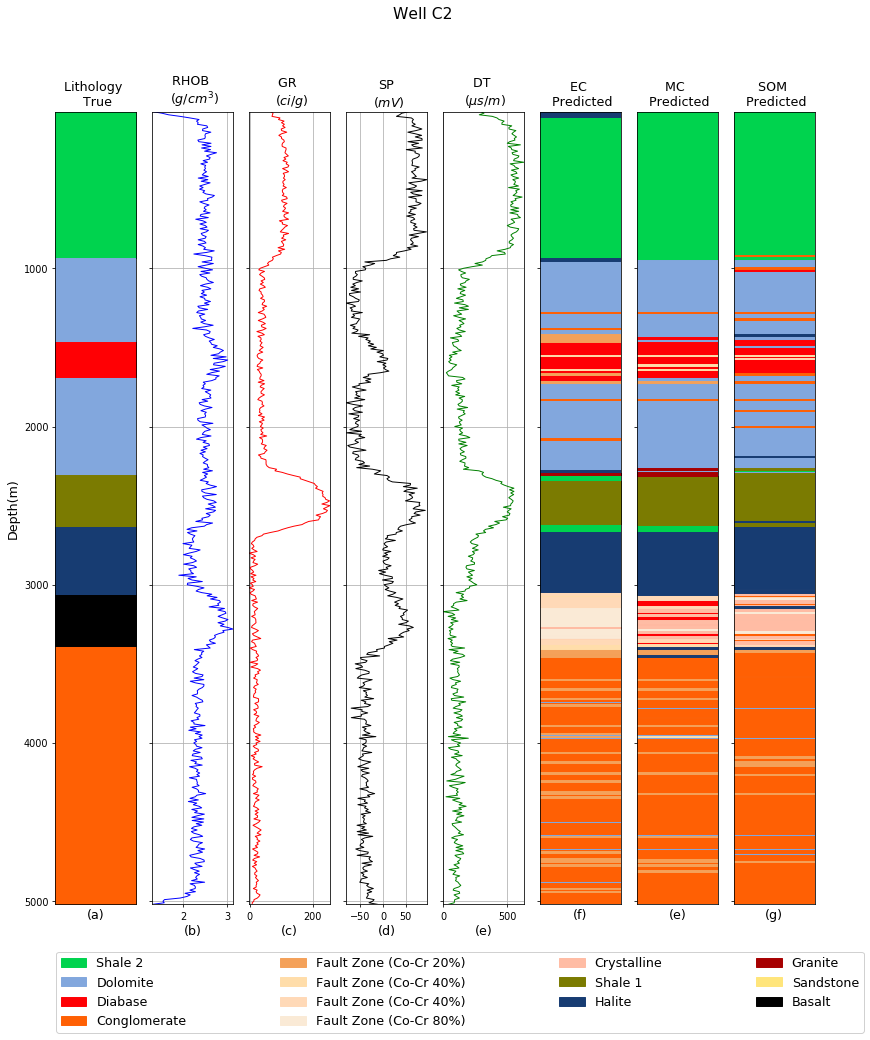

In [11]:
padrao={'comprimento':14,
            'altura':15,
        'titulo_geral': 'Well C2'
}

figure2 = plm2(8, padrao)
figure2.plot_l2(0,cod,prof, codigo1,{'titulo':'Lithology \n True', 'descricao_y':'Depth(m)','descricao_x':'(a)'})
figure2.plot_s(1,RHOB,prof,{'titulo':'RHOB \n $(g/cm^{3})$','cor':'b','alfabeto':'b','descricao_x':'(b)'})
figure2.plot_s(2,GR,prof,{'titulo':'GR \n $(ci/g$)','cor':'r','descricao_x':'(c)'})
figure2.plot_s(3,SP,prof,{'titulo':'SP\n $(mV)$', 'cor':'k','descricao_x':'(d)'})
figure2.plot_s(4,DT,prof,{'titulo':'DT \n $(\mu s/m)$','cor':'g','descricao_x':'(e)'})
figure2.plot_l2(5,ClassEuclides,prof, codigo1,{'titulo':'EC \n Predicted','descricao_x':'(f)'})
figure2.plot_l2(6,ClassMahalanobis,prof, codigo1,{'titulo':'MC \n Predicted','descricao_x':'(e)'})
figure2.plot_l2(7,ClassKohonen,prof, codigo1,{'titulo':'SOM \n Predicted','descricao_x':'(g)'})
figure2.legenda({'ancoragem':(0.01, 0.09, 10.0, -0.15),'colunas':4,'ordem':[0,1,2,3,4,5,6,7,8,9,10,11,12,13] })
    


plt.savefig('../images/wellC2_nx80_v02.pdf', dpi=300, bbox_inches = 'tight', transparent = True)

# Grafico da Matrix de confusao para o POCO C2:



In [ ]:
def confusao(lit_1,lit_2,label_1 = False,label_2 = False,log=False,tipo="numerico"):

    # ::::::::::::::::::::::::::::::::::::::::::::::: #
    # Definição de variáveis

    s_1 = sorted(list(set(lit_1))) # lista dos elementos de lit_1
    s_2 = sorted(list(set(lit_2))) # lista dos elementos de lit_2

    if log:
        print(s_1)
        print(s_2)

    # ::::::::::::::::::::::::::::::::::::::::::::::: #
    # salvando as labels (loop dos elementos)

    nms_1 = []
    for i in range(len(s_1)):
        if label_1:
            nms_1.append(label_1[int(s_1[i])])
        else:
            nms_1.append(int(s_1[i]))

    # ________________________ #

    nms_2 = []
    for i in range(len(s_2)):
        if label_1:
            if label_2:
                nms_2.append(label_2[int(s_2[i])])
            else:
                nms_2.append(label_1[int(s_2[i])])
        else:
            nms_2.append(int(s_2[i]))

    # ::::::::::::::::::::::::::::::::::::::::::::::: #
    # Calculando o erro geral para apresentação

    err = []
    for i in range(len(lit_1)):
        if lit_1[i] == lit_2[i]:
            err.append(1)
        else:
            err.append(0)

    if log:
        print('acerto = ',sum(err),'de',len(err),'equivalente a',(sum(err)/len(err))*100.0,'%')

    # ::::::::::::::::::::::::::::::::::::::::::::::: #
    # calculo dos valores (por dicionário)

    CM = {}
    M1 = []
    for j in range(len(s_1)):
        CM[int(s_1[j])] = {}
        M0 = []
        for i in range(len(s_2)):
            values = []
            for jj in range(len(lit_1)):
                if lit_1[jj] == int(s_1[j]):
                    if lit_2[jj] == int(s_2[i]):
                        values.append(1)
                    else:
                        values.append(0)

            sv = sum(values)
            CM[int(s_1[j])][s_2[i]] = sv
            M0.append(sv)
        M1.append(M0)

    # ::::::::::::::::::::::::::::::::::::::::::::::: #
    # calculando proporções

    linhas = np.shape(M1)[0]
    colunas = np.shape(M1)[1]
    tamanho = len(lit_1)

    if tipo == "numerico": # numeros de elementos contados (padrão)
        M1 = np.array(M1)
        MF = M1.copy()

    # ________________________ #

    if tipo == "proporcao": # proporcao em funcao do total
        M1 = np.array(M1,float)
        MF = M1.copy()

        for j in range(linhas):
            for i in range(colunas):
                MF[j,i] = (M1[j,i])/(tamanho)

    # ________________________ #

    if tipo == "proporcao_linha": # proporcao em funcao da linha
        M1 = np.array(M1,float)
        MF = M1.copy()

        for j in range(linhas):
            soma = sum(M1[j])
            for i in range(colunas):
                MF[j,i] = (M1[j,i])/(soma)

    # ________________________ #

    if tipo == "proporcao_coluna": # proporcao em funcao da coluna
        M1 = np.array(M1,float)
        MF = M1.copy()

        for i in range(colunas):
            soma = sum(MF[:,i])
            for j in range(linhas):
                MF[j,i] = (M1[j,i])/(soma)

    # ::::::::::::::::::::::::::::::::::::::::::::::: #
    # Tabela e gráficos

    the_table = plt.table(cellText=MF,
                      colWidths=[0.1] * len(lit_2),
                      rowLabels=nms_1,
                      colLabels=nms_2,
                      loc='center')

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(24)
    the_table.scale(4, 4)

    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    #plt.show()
    
    return MF

In [ ]:
# criando os eixos para o grafico:
aa = np.unique(cod)
aa
eixo_y = []
for i in range(len(aa)):
    eixo_y.append(codigo1[aa[i]][1] ) 

#----------------------------------------------------------

bb = np.unique(ClassEuclides)
eixo_x = []
for i in range(len(bb)):
    eixo_x.append(codigo1[bb[i]][1] )
    
eixo_y

In [ ]:
# pegando as informacoes contidas no dicionario:

# patrix de confusao entre o real e euclides:    
CM_Eucl = confusao(cod, ClassEuclides)
CM_Maha = confusao(cod, ClassMahalanobis)
CM_SOM  = confusao(cod, ClassKohonen)

In [ ]:
# Graficos:
py.rcParams['figure.figsize'] = (24, 9) 
fig, ax = plt.subplots(nrows=1, ncols=1)

im1 = sns.heatmap(CM_Eucl, cmap='copper_r', annot=True, 
                 yticklabels=eixo_y, xticklabels=eixo_x, cbar=True, linecolor='k', linewidths=2, fmt='.3g')

im1.set_title('Confusion Matrix - EC', fontsize=18)

plt.savefig('../images/wellC1.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
#plt.savefig('../../Latex/imagens/CM_Eucli_C2.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
plt.show()

In [ ]:
# Maha:
bb = np.unique(ClassMahalanobis)
eixo_x = []
for i in range(len(bb)):
    eixo_x.append(codigo1[bb[i]][1] )
eixo_y

In [ ]:
# Graficos:
py.rcParams['figure.figsize'] = (23, 8) 
fig, ax = plt.subplots(nrows=1, ncols=1)

im1 = sns.heatmap(CM_Maha, cmap='copper_r', annot=True, 
                 yticklabels=eixo_y, xticklabels=eixo_x, cbar=True, linecolor='k', linewidths=2, fmt='.3g')

im1.set_title('Confusion Matrix - MC', fontsize=18)

plt.savefig('../images/wellC1.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
#plt.savefig('../../Latex/imagens/CM_Maha_C2.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
plt.show()

In [ ]:
# Kohonen:
# Maha:
bb = np.unique(ClassKohonen)
eixo_x = []
for i in range(len(bb)):
    eixo_x.append(codigo1[bb[i]][1] )
eixo_y

In [ ]:
# Graficos:
py.rcParams['figure.figsize'] = (19, 8) 
fig, ax = plt.subplots(nrows=1, ncols=1)

im1 = sns.heatmap(CM_SOM, cmap='copper_r', annot=True, 
                 yticklabels=eixo_y, xticklabels=eixo_x, cbar=True, linecolor='k', linewidths=2, fmt='.3g')

im1.set_title('Confusion Matrix - SOM', fontsize=18)

plt.savefig('../images/CM_Kohonen_C2.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
#plt.savefig('../../Latex/imagens/CM_Kohonen_C2.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
plt.show()